# Preliminary data visualization

Reading the data from csv

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("IMDb movies.csv")

#Source: https://www.in2013dollars.com/us/inflation/
inflation = {1900:31.0 ,1901:30.63 , 1902:30.28 ,1903:29.59,1904:29.26 ,1905:29.59 ,1906:28.93 ,1907:27.70 , 1908:28.30 , 1909:28.61 ,
            1910:27.41 ,1911:27.41 , 1912:26.84 ,1913:26.30 ,1914:26.30 ,1915:25.78 ,1916:23.89 ,1917:20.34 , 1918:17.24 , 1919:15.05 ,
            1920:13.02 ,1921:14.55 , 1922:15.50 ,1923:15.23 ,1924:15.23 ,1925:14.88 ,1926:14.71 ,1927:14.96 , 1928:15.23 , 1929:15.23 ,
            1930:15.59 ,1931:17.13 , 1932:19.01 ,1933:20.03 ,1934:19.43 ,1935:19.01 ,1936:18.73 ,1937:18.08 , 1938:18.47 , 1939:18.73 ,
            1940:18.60 ,1941:17.71 , 1942:15.97 ,1943:15.05 ,1944:14.79 ,1945:14.47 ,1946:13.35 ,1947:11.68 , 1948:10.90 , 1949:10.94 ,
            1950:10.80 ,1951:10.01 , 1952:9.83 ,1953:9.75 ,1954:9.68 ,1955:9.72 ,1956:9.57 ,1957:9.27 , 1958:9.01 , 1959:8.95 ,
            1960:8.80 ,1961:8.71 , 1962:8.62 ,1963:8.51 ,1964:8.40 ,1965:8.27 ,1966:8.04 ,1967:7.80 , 1968:7.48 , 1969:7.10 ,
            1970:6.71 ,1971:6.43 , 1972:6.23 ,1973:5.86 ,1974:5.28 ,1975:4.84 ,1976:4.58 ,1977:4.30 , 1978:3.99 , 1979:3.59 ,
            1980:3.16 ,1981:2.86 , 1982:2.70 ,1983:2.61 ,1984:2.51 ,1985:2.42 ,1986:2.38 ,1987:2.29 , 1988:2.20 , 1989:2.10 ,
            1990:1.99 ,1991:1.91 , 1992:1.86 ,1993:1.80 ,1994:1.76 ,1995:1.71 ,1996:1.66 ,1997:1.62 , 1998:1.60 , 1999:1.56 ,
            2000:1.51 ,2001:1.47 , 2002:1.45 ,2003:1.42 ,2004:1.38 ,2005:1.33 ,2006:1.29 ,2007:1.26 , 2008:1.21 , 2009:1.21 ,
            2010:1.19 ,2011:1.16 , 2012:1.13 ,2013:1.12 ,2014:1.10 ,2015:1.10 ,2016:1.08 ,2017:1.06 , 2018:1.04 , 2019:1.02, 2020:1 }
data.year.value_counts()

C:\Users\kasutaja\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


2017    3223
2018    3182
2016    2992
2015    2764
2014    2517
        ... 
1966       1
1980       1
1988       1
1964       1
1989       1
Name: year, Length: 168, dtype: int64

In [2]:
def inflation_adjust(df):
    df = inflation_adjust_budget(df)
    df = inflation_adjust_income(df)
    return df
def inflation_adjust_budget(df):
    df = df.dropna(subset=['budget'])
    df = df[df.budget.str.startswith("$")]
    df.budget = df.budget.str.slice(2).astype(int)
    df.year = df.year.astype(int)
    df["budget_adjusted"] = df.apply(lambda row: row.budget * inflation[row.year], axis=1)
    return df
def inflation_adjust_income(df):
    df = df.dropna(subset=['worlwide_gross_income'])
    df = df[df.worlwide_gross_income.str.startswith("$")]
    df.worlwide_gross_income = df.worlwide_gross_income.str.slice(2).astype(float)
    df.year = df.year.astype(int)
    df["income_adjusted"] = df.apply(lambda row: row.worlwide_gross_income * inflation[row.year], axis=1)
    return df

<BarContainer object of 96 artists>

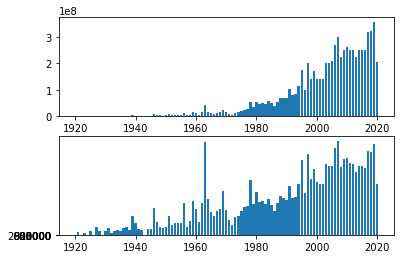

In [3]:
data_budget = inflation_adjust(data)
years = data_budget.year.unique().astype(int)
maxbudget = []
for year in years:  
    maxbudget.append(np.max(data_budget[data_budget.year == year].budget))
fig, (normal, inflation_plot) = plt.subplots(2)
normal.bar(years, maxbudget)
plt.yticks(np.arange(5),maxbudget)
maxbudget = []
for year in years:  
    maxbudget.append(np.max(data_budget[data_budget.year == year].budget_adjusted))
inflation_plot.bar(years, maxbudget)

In [4]:
data_income = data.dropna(subset=['worlwide_gross_income'])
data_income = data_income[data_income.worlwide_gross_income.str.startswith("$")]
data_income.worlwide_gross_income = data_income.worlwide_gross_income.str.slice(2).astype(float)



In [5]:
data_genres = data.dropna(subset=['genre'])
genres_unique = []
for index, row in data_genres.iterrows():
    genres = row.genre.split(", ")
    for genre in genres:
        if genre not in genres_unique:
            genres_unique.append(genre)

In [6]:
def genre_binary(df):
    df = df.dropna(subset=['genre'])
    for genre_unique in genres_unique:
        df[genre_unique] = 0

    for index, row in df.iterrows():
        genres = row.genre.split(", ")
        for genre in genres:
            df.at[index, genre] = 1
    return df

        
#for index, row in data_genres.iterrows(): This part is not working correctly
#    for genre_unique in genres_unique:
#        if genre_unique in data_genres.iloc[index].genre.split(", "):
#            row[genre_unique] = 1

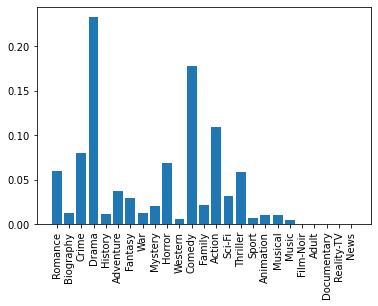

In [7]:
def genre_popularity(df, year):
    popularity = {}
    df_year = df[df.year == year]
    for unique in genres_unique:
        popularity[unique] = df_year[unique].sum(axis=0)
    return popularity

def plot_genre_popularity(popularity):
    plt.bar(range(len(popularity)), list(popularity.values())/sum(popularity.values()), align='center')
    plt.xticks(range(len(popularity)), list(popularity.keys()), rotation='vertical')

data_genres = genre_binary(data)
plot_genre_popularity(genre_popularity(data_genres, 1990))

In [8]:
data_ml = data.dropna(subset=['country'])
data_ml = data_ml[data_ml.country.str.contains("USA")]
data_ml = inflation_adjust(data_ml)
data_ml = data_ml[["year","duration","budget_adjusted","income_adjusted","genre"]]#Still need to decide if to use values that are adjusted to inflation
data_ml = genre_binary(data_ml).drop(["genre"],axis=1)
data_ml = pd.get_dummies(data_ml, columns=genres_unique)
data_ml

,year,duration,budget_adjusted,income_adjusted,Romance_0,Romance_1,Biography_0,Biography_1,Crime_0,Crime_1,...,Musical_1,Music_0,Music_1,Film-Noir_0,Film-Noir_1,Adult_0,Documentary_0,Documentary_1,Reality-TV_0,News_0
245,1921,150,11640000.0,1.336224e+08,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
251,1921,68,3637500.0,3.916278e+05,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
348,1923,82,5345730.0,1.710786e+05,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
415,1925,95,13734240.0,4.005101e+05,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
600,1927,94,2992000.0,1.811761e+06,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85176,2019,96,30498000.0,7.000430e+07,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
85221,2020,86,10000000.0,2.031154e+07,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
85266,2020,92,3000000.0,1.069109e+07,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1
85397,2019,84,5100000.0,9.528660e+06,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,1,1


# Predictions

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import seaborn as sns



plt.figure(figsize=(5,5))
sns.lineplot(data=data_ml, x="year", y="duration")
plt.show()

plt.figure(figsize=(5,5))
sns.lineplot(data=inflation_adjust_budget(data), x="year", y="budget_adjusted")
plt.show()

plt.figure(figsize=(5,5))
sns.lineplot(data=inflation_adjust_income(data), x="year", y="income_adjusted")
plt.show()

plt.figure(figsize=(5,5))
sns.lineplot(data=inflation_adjust(data), x="budget_adjusted", y="income_adjusted")
plt.show()




#X = data_ml['year']
#y = data_ml['duration']
#
## fit final model
#model = LinearRegression()
#model.fit(X, y)
#
#Xnew = [[2010, 2020]]
#
## making a prediction
#ynew = model.predict(Xnew)
#
## showing the inputs and predicted outputs
#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [ ]:
#there are probably better ways to do this, but like this there is only one column per genre
pd.options.display.float_format = '{:.0f}'.format
data_genres = data_genres.drop(columns=['genre'])
data_genres = data_genres.dropna(subset=['country'])
data_genres = data_genres[data_genres.country.str.contains("USA")]
#data_genres = inflation_adjust(data_genres)
data_genres = data_genres.drop(columns = ['imdb_title_id', 'title', 'original_title', 'date_published', 'country', 
       'language', 'director', 'writer', 'production_company', 'actors',
       'description', 'avg_vote', 'votes', 'usa_gross_income',
       'metascore', 'reviews_from_users',
       'reviews_from_critics',])
data_genres = data_genres.dropna(subset=['worlwide_gross_income'])
data_genres = data_genres.dropna(subset=['budget'])
data_genres = data_genres[data_genres.budget.str.startswith("$")]
data_genres = data_genres[data_genres.worlwide_gross_income.str.startswith("$")]
data_genres.worlwide_gross_income = data_genres.worlwide_gross_income.str.slice(2).astype(float)
data_genres.budget = data_genres.budget.str.slice(2).astype(int)
data_genres.year = data_genres.year.astype(int)

In [ ]:
def income_to_classes(df):
    c = 'worlwide_gross_income'
    for index, row in df.iterrows():
        if int(df.at[index, c]) <= 10000:
            df.at[index, c] = 1
        elif int(df.at[index, c]) <= 100000:
            df.at[index, c] = 2
        elif int(df.at[index, c]) <= 1000000:
            df.at[index, c] = 3
        elif int(df.at[index, c]) <= 10000000:
            df.at[index, c] = 4
        elif int(df.at[index, c]) <= 100000000:
            df.at[index, c] = 5
        elif int(df.at[index, c]) <= 1000000000:
            df.at[index, c] = 6
        else:
            df.at[index, c] = 7
    return df

In [ ]:
data_genres = income_to_classes(data_genres)
data_genres

In [ ]:
#data_genres.income_adjusted.value_counts()

In [ ]:
#works when income is divided into classes
def get_accuracy(actual, predictions):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == round(predictions[i]):
            correct += 1
    return round(correct*100/len(actual), 2)

In [ ]:
data_genres = data_genres[(data_genres.year >= 1920) & (data_genres.year <= 2020)]
data_genres.shape
data_genres.worlwide_gross_income.value_counts()

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
#tested also with non-regressive models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

features = data_genres.drop(columns = ['worlwide_gross_income'])
labels = data_genres.worlwide_gross_income

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=2)

models = []
models.append(LinearRegression().fit(X_train, y_train))
models.append(Lasso().fit(X_train, y_train))
models.append(KNeighborsRegressor(11).fit(X_train, y_train))
models.append(LogisticRegression().fit(X_train, y_train))
models.append(RandomForestClassifier(criterion = 'gini', max_depth = 11, n_estimators = 100).fit(X_train, y_train))
models.append(DecisionTreeClassifier(max_depth=7).fit(X_train, y_train))
models.append(KNN(15).fit(X_train, y_train))

y_test_arr = np.array(y_test)

results_df = pd.DataFrame(columns = ['model', 'accuracy'])

for model in models:
    #accuracy = get_accuracy(y_test_arr, models[i].predict(X_test))
    results_df = results_df.append({'model': str(model), 
                                    'accuracy': get_accuracy(y_test_arr, model.predict(X_test))}, 
                                    ignore_index=True)

results_df